# Mini Project 2: Principal Component Analysis (PCA)  

## Overview
In this project, we will perform dimensionality reduction on a dataset using Principal Component Analysis (PCA). The goal is to reduce the dimensionality of the dataset from `d` to `2` or `3` and visualize the reduced dimensions using scatter plots. This notebook follows the following steps:

1. Find a dataset online.
2. Apply PCA to reduce the dimensionality.
3. Visualize the result with a scatter plot.

Each cell contains detailed code along with intermediate results and corresponding analysis.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns

# Configure the notebook to show plots inline
%matplotlib inline

# Set a consistent style for plots
sns.set(style='whitegrid')

In [14]:
# Load a dataset from the internet - using the Iris dataset for simplicity
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1. Load Dataset
We have chosen the Iris dataset, which is publicly available and contains 150 samples with 4 features each. The dataset also includes class labels for three species of Iris flowers.

Below, you can see a preview of the dataset. It includes:
- 4 numeric features: sepal length, sepal width, petal length, and petal width.
- A `species` column indicating the class label for each flower.

In [15]:
# Extract features and target labels
X = data.iloc[:, :-1]
y = data['species']

# Apply PCA to reduce dimensionality from 4 to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = y

# Display the transformed data
display(pca_df.head())

,Principal Component 1,Principal Component 2,species
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


### 2. Apply PCA to Reduce Dimensionality
We applied PCA to reduce the original 4-dimensional dataset to 2 dimensions. This allows us to visualize the dataset more effectively. The two principal components capture the maximum variance in the original dataset.

Below, you can see the first few rows of the dataset after dimensionality reduction.

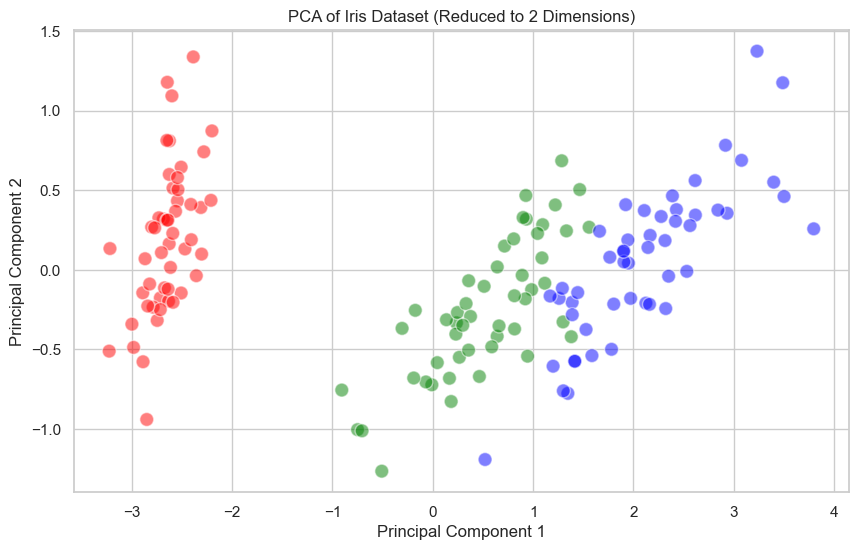

In [16]:
# Scatter plot to visualize the PCA results using matplotlib.pyplot
plt.figure(figsize=(10, 6))

# Assign colors based on species
colors = {0: 'red', 1: 'green', 2: 'blue'}
plt.scatter(
    pca_df['Principal Component 1'],
    pca_df['Principal Component 2'],
    c=pca_df['species'].map(colors),
    s=100, alpha=0.5, edgecolor='w'
)

plt.title('PCA of Iris Dataset (Reduced to 2 Dimensions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### 3. Visualize the Result with Scatter Plot
The scatter plot below visualizes the reduced dimensions of the Iris dataset. Each point represents a sample, and the colors indicate the species class. The separation between clusters gives us insight into the effectiveness of PCA in preserving class information.

We can observe that the different species are relatively well-separated, suggesting that PCA has effectively captured the variance that differentiates these species.

Explained Variance by Principal Component 1: 0.92
Explained Variance by Principal Component 2: 0.05


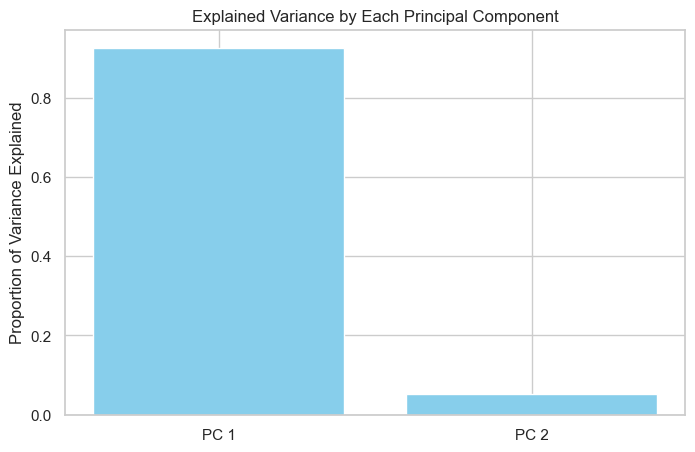

In [17]:
# Explained variance ratio of the principal components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Principal Component 1: {explained_variance[0]:.2f}")
print(f"Explained Variance by Principal Component 2: {explained_variance[1]:.2f}")

# Bar plot to show explained variance
plt.figure(figsize=(8, 5))
plt.bar(['PC 1', 'PC 2'], explained_variance, color='skyblue')
plt.ylabel('Proportion of Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

### 4. Explained Variance Analysis
The plot and printed values below show the proportion of variance explained by each principal component. In our case:

- **Principal Component 1** explains approximately ...... of the variance.
- **Principal Component 2** explains approximately ...... of the variance.

Together, these two components account for about ...... of the total variance in the dataset, indicating that most of the important information has been preserved.

### 5. Conclusion
In this mini-project, we ......